In [1]:
import pathlib

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
import importlib

plt.style.use(['science', 'notebook'])

In [16]:
import simulation
importlib.reload(simulation)

<module 'simulation' from 'C:\\bogachevv\\Python\\StatPhys\\simulation.py'>

In [17]:
np.random.seed(42)


n_particles = 100

r = np.random.uniform(size=(2, n_particles))
v = np.zeros_like(r)
# v = np.random.uniform(low=-500, high=500, size=(2,n_particles))
# m = torch.ones((n_particles, )).to(device)
m = np.ones((n_particles, )) * (10 ** (-5))
m[0] = 10 ** (-4)
m[1] = 10 ** (-4)

l_0 = 0.1

frames_c = 5_000

Формула расчета скорости при столкновении:
$v_1^{(new)} = v_1 - \langle \frac{2m_2}{m_1 + m_2} (v_1 - v_2), r_1 - r_2 \rangle \cdot \frac{r_1 - r_2}{{\lVert r_1 - r_2 \rVert}^2}$
$v_2^{(new)} = v_2 - \langle \frac{2m_1}{m_1 + m_2} (v_1 - v_2), r_1 - r_2 \rangle \cdot \frac{r_1 - r_2}{{\lVert r_1 - r_2 \rVert}^2}$

In [18]:
ixr = r[0]>0.5 #right
ixl = r[0]<=0.5 #left

v[0][ixr] = -500
v[0][ixl] = 500

In [19]:
v

array([[ 500., -500., -500., -500.,  500.,  500.,  500., -500., -500.,
        -500.,  500., -500., -500.,  500.,  500.,  500.,  500., -500.,
         500.,  500., -500.,  500.,  500.,  500.,  500., -500.,  500.,
        -500., -500.,  500., -500.,  500.,  500., -500., -500., -500.,
         500.,  500., -500.,  500.,  500.,  500.,  500., -500.,  500.,
        -500.,  500., -500., -500.,  500., -500., -500., -500., -500.,
        -500., -500.,  500.,  500.,  500.,  500.,  500.,  500., -500.,
         500.,  500., -500.,  500., -500.,  500., -500., -500.,  500.,
         500., -500., -500., -500., -500.,  500.,  500.,  500., -500.,
        -500.,  500.,  500.,  500.,  500., -500., -500., -500.,  500.,
         500., -500., -500., -500., -500.,  500., -500.,  500.,  500.,
         500.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0

In [20]:
sim = simulation.Simulation(
    gamma=1.0,
    k=150,
    l_0=l_0,
    R=0.001,
    R_spring=0.025,
    r=r[:, 2:],
    r_spring=r[:, 0:2],
    v=v[:, 2:],
    v_spring=v[:, 0:2],
    m=m[2:],
    m_spring=m[0:2]
)

In [21]:
sim.T

106.8840579710145

In [11]:
radius = 0.0005
# rs, vs, fs = sim.motion(r, v, ids_pairs, ts=frames_c, dt=0.000008, d_cutoff=2*radius, k=100)
rs = np.zeros((frames_c, 2, n_particles))
vs = np.zeros((frames_c, 2, n_particles))
fs = np.zeros((frames_c, ))
ts = np.zeros((frames_c, ))
ps = np.zeros((frames_c, ))


for i in range(frames_c):
    new_r, new_r_spr, new_v, new_v_spr, new_f = next(sim)
    rs[i, :, 0:2] = new_r_spr
    rs[i, :, 2:] = new_r
    vs[i, :, 0:2] = new_v_spr
    vs[i, :, 2:] = new_v
    fs[i] = new_f
    ts[i] = sim.T
    ps[i] = sim.calc_potential_energy()
    # fs[i] = np.linalg.norm(new_f)

In [13]:
plt.plot(range(frames_c), ts)

2.0000000000000004

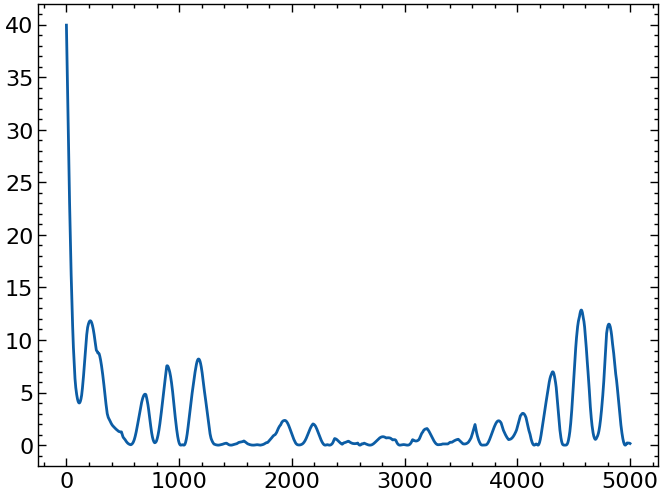

In [17]:
plt.plot(range(frames_c), ps)

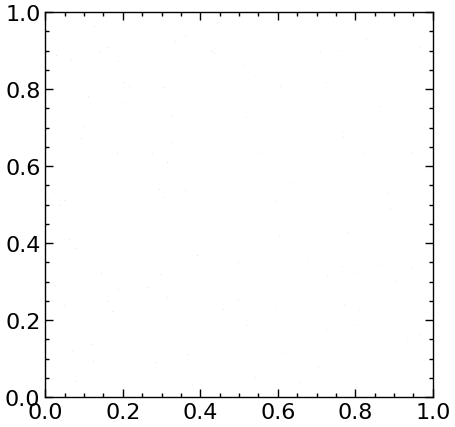

In [18]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xred, yred = rs[0][0][ixr], rs[0][1][ixr]
xblue, yblue = rs[0][0][ixl],rs[0][1][ixl]
circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
ax.add_collection(cred)
ax.add_collection(cblue)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

In [19]:
# fig, ax = plt.subplots(1,1,figsize=(5,5))
# ax.clear()
# vmin = 0
# vmax = 1
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
# markersize = 2 * radius * ax.get_window_extent().width  / (vmax-vmin) * 72./fig.dpi
# 
# spring, = ax.plot([], [], 'o', color='black', markersize=10*markersize)
# red, = ax.plot([], [], 'o', color='red', markersize=markersize)
# blue, = ax.plot([], [], 'o', color='blue', markersize=markersize)
# 
# def animate(i):
#     print(f"{i=}")
#     xred, yred = rs[i][0][ixr].cpu(), rs[i][1][ixr].cpu()
#     xblue, yblue = rs[i][0][ixl].cpu(),rs[i][1][ixl].cpu()
#     x_spring, y_spring = rs[i][0][0:2].cpu(), rs[i][1][0:2].cpu()
#     red.set_data(xred, yred)
#     blue.set_data(xblue, yblue)
#     spring.set_data(x_spring, y_spring)
#     return red, blue
# 
# # writer = animation.FFMpegWriter(fps=30)
# ani = animation.FuncAnimation(fig, animate, frames=1_000, interval=25, blit=True)
# path = pathlib.Path('./anim_brown_spring.gif')
# ani.save(path, dpi=100)

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].clear()
ax[1].clear()
vmin = 0
vmax = 1

# x_lim = (torch.min(rs[:, 0, :]).cpu() - 1, torch.max(rs[:, 0, :]).cpu() + 1)
# y_lim = (torch.min(rs[:, 1, :]).cpu() - 1, torch.max(rs[:, 1, :]).cpu() + 1)

x_lim, y_lim = (0, 1), (0, 1)

markersize = 2 * radius * ax[0].get_window_extent().width  / (vmax-vmin) * 72./fig.dpi
spring, = ax[0].plot([], [], 'o', color='black', markersize=10*markersize)
red, = ax[0].plot([], [], 'o', color='red', markersize=markersize)
blue, = ax[0].plot([], [], 'o', color='blue', markersize=markersize)
force, = ax[1].plot([], [], color='k')

def animate(i):
    if i % 10 == 0:
        print(f"Process: {i}/{frames_c}")
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    x_spring, y_spring = rs[i][0][0:2], rs[i][1][0:2]
    # red.set_data(xred, yred)
    # blue.set_data(xblue, yblue)
    # force.set_data(np.arange(1_000)[0:i], fs.norm(dim=1)[0:i])
    # return [(red, blue), force]

    ax[0].clear()
    ax[1].clear()

    ax[0].scatter(xred, yred, color='red')
    ax[0].scatter(xblue, yblue, color='blue')
    ax[0].scatter(x_spring, y_spring, color='black', s=5*(plt.rcParams['lines.markersize'] ** 2))
    # ax[1].plot(np.arange(10_000)[0:i], fs.norm(dim=1)[0:i])
    ax[1].plot(np.arange(10_000)[0:i], fs[0:i])

    ax[0].set_xlim(x_lim)
    ax[0].set_ylim(y_lim)

writer = animation.FFMpegWriter(fps=30)
ani = animation.FuncAnimation(fig, animate, frames=frames_c, interval=25, blit=False)
path = pathlib.Path('./anim_brown_spring_own.mp4')
ani.save(path, writer=writer, dpi=100)

Process: 0/5000
Process: 0/5000


In [ ]:
plt.plot(np.arange(frames_c), fs)

In [ ]:
np.min(fs)

In [ ]:
plt.rcParams['lines.markersize'] ** 2

In [ ]:
# force.min()

In [ ]:
from scipy import fft

In [ ]:
# force = fs.norm(dim=1).cpu().numpy()
force = fs.cpu()
force -= (force[-1] - force[0]) * np.linspace(0, 1, num=frames_c) + force[0]
force_fft = fft.fft(force)

In [ ]:
plt.plot(force_fft[10000:-10000])

In [ ]:
force[-1]

In [ ]:
torch.range(start=0, end=10)

In [ ]:
sim.r.shape

In [ ]:
sim.set_params(particles_cnt=100)

In [ ]:
sim.r.shape

In [ ]:
sim.r[:, -1]

In [ ]:
sim.v[:, -1]

In [ ]:
sim.m[-1]